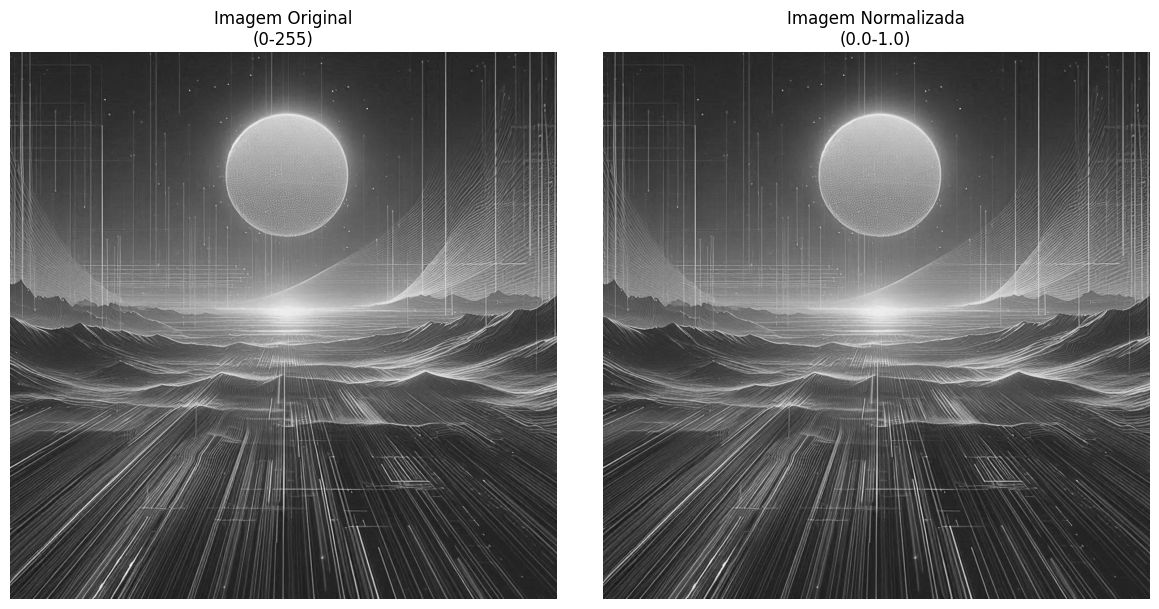

Original - Min: 4.333333333333333, Max: 254.33333333333334
Normalizada - Min: 0.0170, Max: 0.9974


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
img = plt.imread('sun.jpeg')

# Converter para escala de cinza
if img.ndim == 3:
    img_gray = img[..., :3].mean(axis=2)  # Média dos canais RGB (ignora alpha)
else:
    img_gray = img  # Já está em grayscale

# Normalizar diretamente para [0, 1]
if img_gray.max() > 1.0:  # Se os valores estiverem em [0, 255]
    img_normalizada = img_gray.astype('float32') / 255.0
else:  # Se já estiver em [0, 1]
    img_normalizada = img_gray.astype('float32')

# Exibir resultados
plt.figure(figsize=(12, 6))

# Subplot para imagem original (em escala de cinza)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255 if img_gray.max() > 1.0 else 1)
plt.title(f'Imagem Original\n(0-{"255" if img_gray.max() > 1.0 else "1"})')
plt.axis('off')

# Subplot para imagem normalizada
plt.subplot(1, 2, 2)
plt.imshow(img_normalizada, cmap='gray', vmin=0, vmax=1)
plt.title('Imagem Normalizada\n(0.0-1.0)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Valores mínimos/máximos
print(f"Original - Min: {img_gray.min()}, Max: {img_gray.max()}")
print(f"Normalizada - Min: {img_normalizada.min():.4f}, Max: {img_normalizada.max():.4f}")

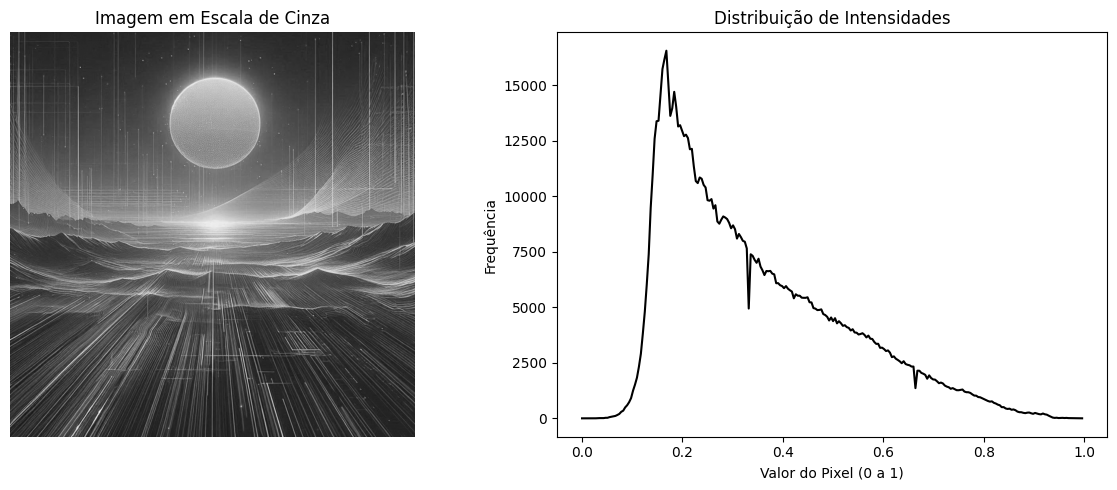

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem
img = plt.imread('sun.jpeg')

# Converte para escala de cinza, se for colorida (com 3 canais RGB)
if img.ndim == 3:
    img = img.mean(axis=2)  # Faz a média dos 3 canais (R, G, B)

# Normaliza para faixa [0, 1] se os valores estiverem acima de 1
if img.max() > 1.0:
    img = img / 255.0  # Normaliza dividindo por 255

# Calcula o histograma usando NumPy (agora com range [0, 1])
hist, bins = np.histogram(img, bins=256, range=(0, 1))

# Visualização da imagem e do histograma
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Exibe a imagem em tons de cinza (agora com vmax=1)
axes[0].imshow(img, cmap='gray', vmin=0, vmax=1)
axes[0].axis('off')
axes[0].set_title('Imagem em Escala de Cinza')

# Plota o histograma de intensidades
axes[1].plot(bins[:-1], hist, color='black')  # bins[:-1] para alinhar com os valores de hist
axes[1].set_title('Distribuição de Intensidades')
axes[1].set_xlabel('Valor do Pixel (0 a 1)')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

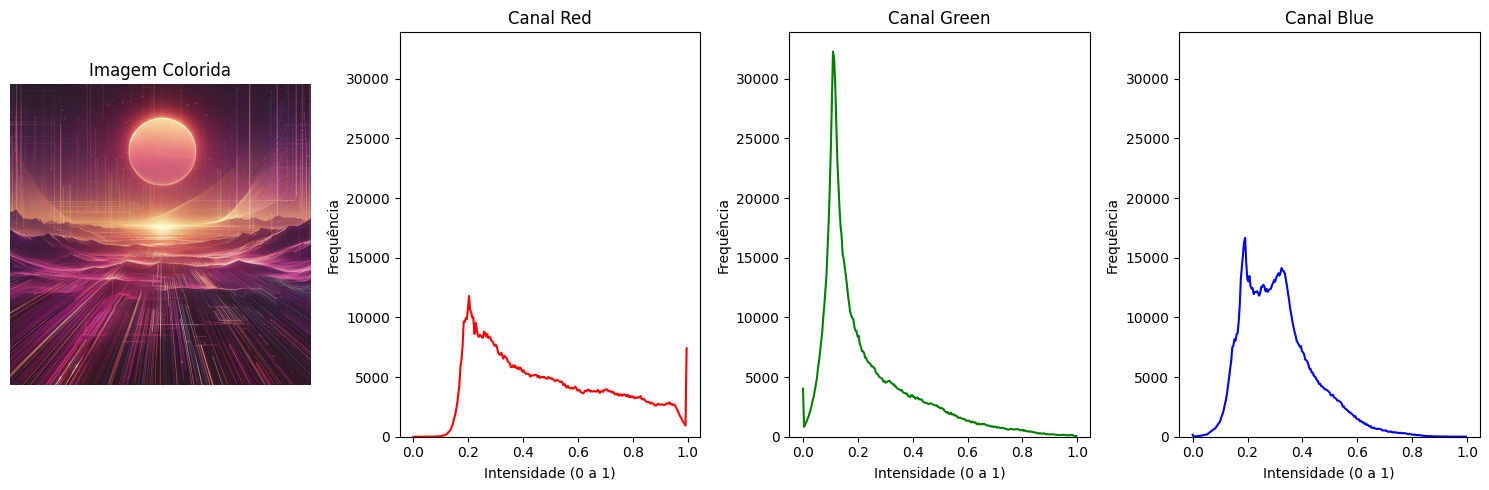

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem colorida
img_color = plt.imread('sun.jpeg')

# Normaliza para [0, 1] se os valores estiverem acima de 1
if img_color.max() > 1.0:
    img_color = img_color / 255.0

# Calcula os histogramas dos canais e armazena os máximos
colors = ('red', 'green', 'blue')
hist_list = []
max_freq = 0

for i in range(3):
    canal = img_color[..., i].ravel()  # equivalente a img_color[:, :, i].ravel()
    hist, bins = np.histogram(canal, bins=256, range=(0, 1))
    hist_list.append((hist, bins))
    max_freq = max(max_freq, hist.max())  # Atualiza o maior valor de frequência

# Plotagem
plt.figure(figsize=(15, 5))

# Imagem original (agora mostrando com vmax=1)
plt.subplot(141)
plt.imshow(img_color, vmin=0, vmax=1)
plt.axis('off')
plt.title('Imagem Colorida')

# Histogramas dos canais com mesma escala no eixo Y
for i, color in enumerate(colors):
    hist, bins = hist_list[i]
    plt.subplot(142 + i)
    plt.plot(bins[:-1], hist, color=color)
    plt.ylim(0, max_freq * 1.05)  # Limite ajustado com margem de 5%
    plt.title(f'Canal {color.title()}')
    plt.xlabel('Intensidade (0 a 1)')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


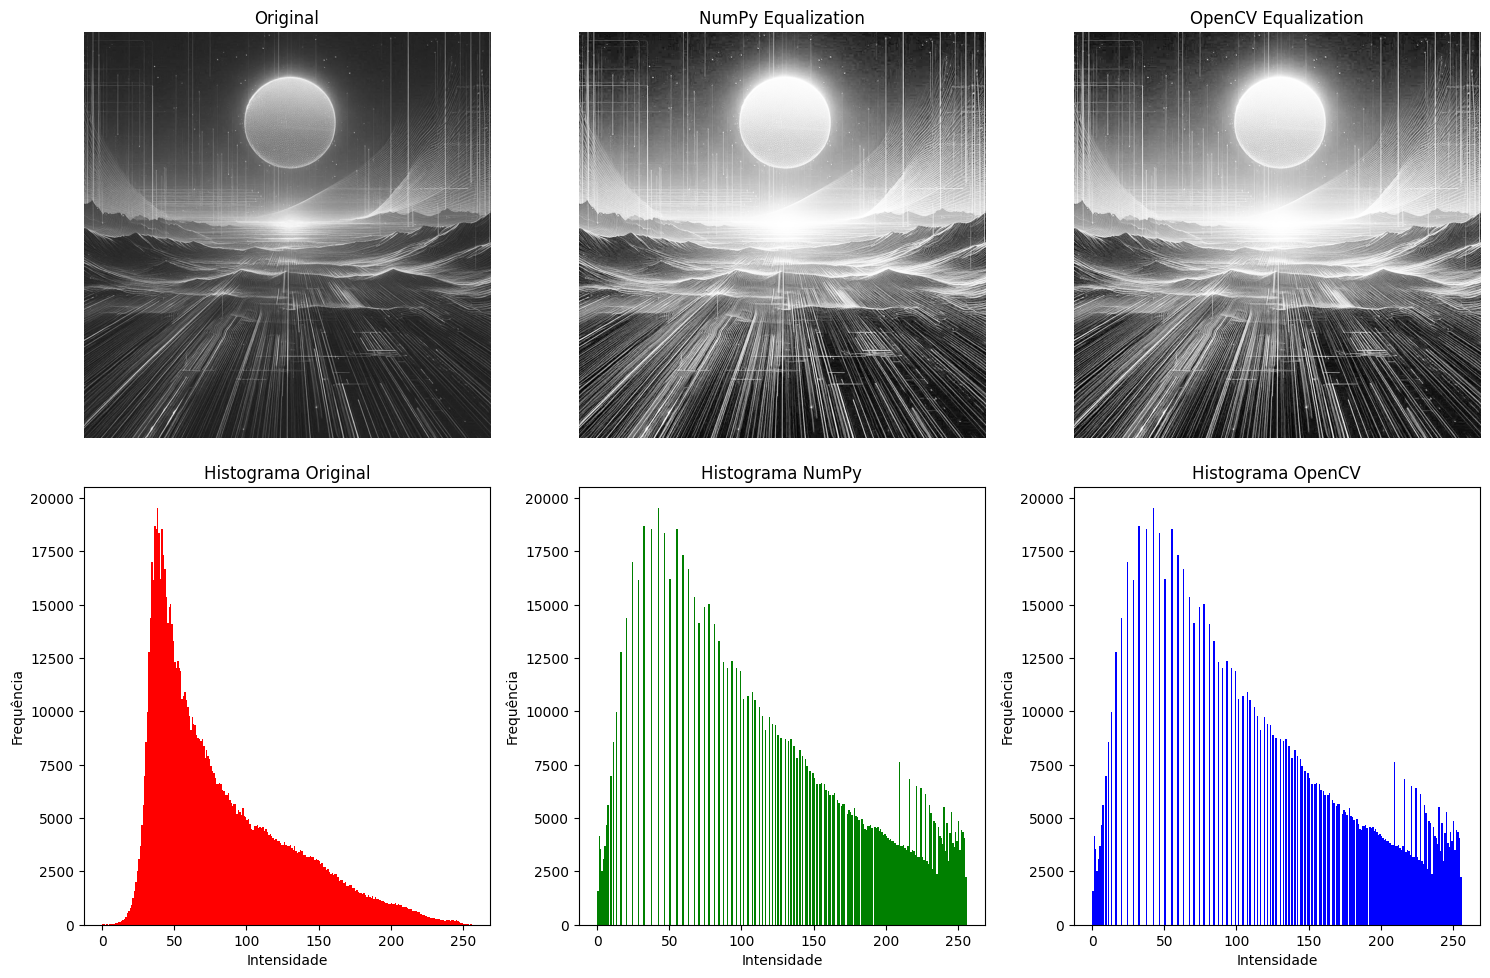

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detailed_histogram_equalization(img, L=256):
    """Implementação didática com todas as etapas matemáticas"""
    # Passo 1: Calcular histograma
    hist = np.bincount(img.flatten(), minlength=L)

    # Passo 2: Calcular PMF e CDF
    pmf = hist / hist.sum()  # Função massa de probabilidade
    cdf = np.cumsum(pmf)     # Função distribuição cumulativa

    # Passo 3: Normalização do CDF
    cdf_min = cdf[hist > 0][0]  # Primeiro valor não-zero
    cdf_norm = (cdf - cdf_min) / (1 - cdf_min)

    # Passo 4: Aplicar transformação
    transformed = np.round((L-1) * cdf_norm).astype(np.uint8)

    # Passo 5: Mapear pixels
    return transformed[img]

# Pipeline completo de análise
img_original = cv2.imread('sun.jpeg', cv2.IMREAD_GRAYSCALE)

# Versões processadas
img_numpy = detailed_histogram_equalization(img_original)
img_opencv = cv2.equalizeHist(img_original)

# Análise comparativa
plt.figure(figsize=(15, 10))

# Visualização das imagens
for i, (title, img) in enumerate(zip(
    ['Original', 'NumPy Equalization', 'OpenCV Equalization'],
    [img_original, img_numpy, img_opencv]
)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')

# Visualização dos histogramas
for i, (title, img, color) in enumerate(zip(
    ['Histograma Original', 'Histograma NumPy', 'Histograma OpenCV'],
    [img_original, img_numpy, img_opencv],
    ['red', 'green', 'blue']
)):
    plt.subplot(2, 3, i+4)
    plt.hist(img.ravel(), bins=256, range=[0,256], color=color)
    plt.title(title)
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

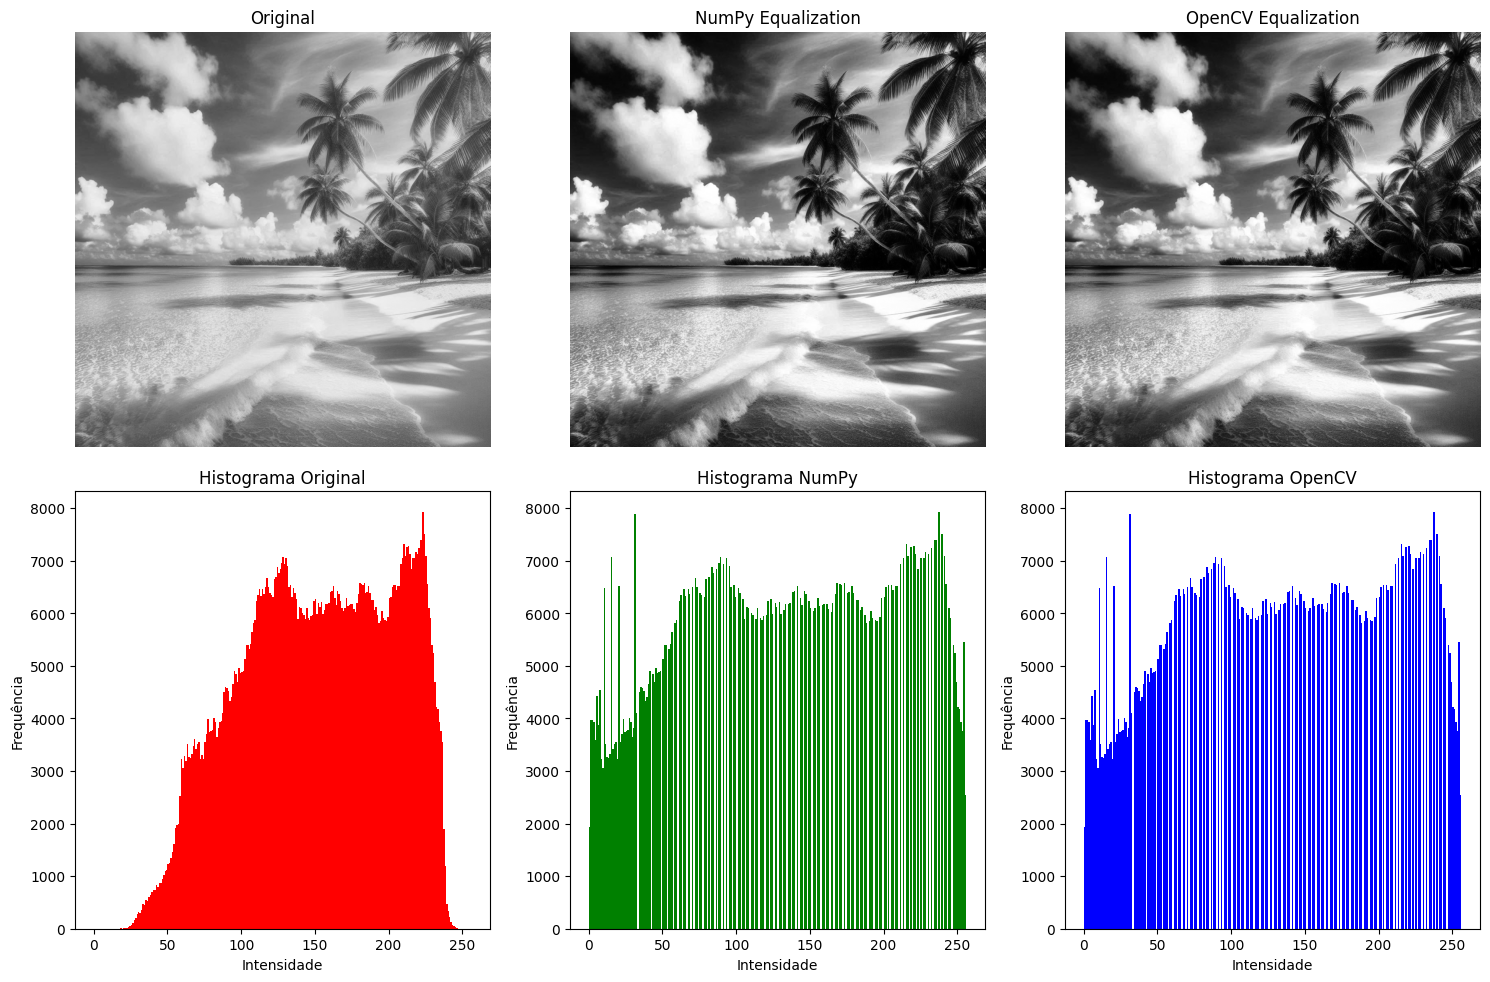

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detailed_histogram_equalization(img, L=256):
    """Implementação didática com todas as etapas matemáticas"""
    # Passo 1: Calcular histograma
    hist = np.bincount(img.flatten(), minlength=L)

    # Passo 2: Calcular PMF e CDF
    pmf = hist / hist.sum()  # Função massa de probabilidade
    cdf = np.cumsum(pmf)     # Função distribuição cumulativa

    # Passo 3: Normalização do CDF
    cdf_min = cdf[hist > 0][0]  # Primeiro valor não-zero
    cdf_norm = (cdf - cdf_min) / (1 - cdf_min)

    # Passo 4: Aplicar transformação
    transformed = np.round((L-1) * cdf_norm).astype(np.uint8)

    # Passo 5: Mapear pixels
    return transformed[img]

# Pipeline completo de análise
img_original = cv2.imread('tropical1.png', cv2.IMREAD_GRAYSCALE)

# Versões processadas
img_numpy = detailed_histogram_equalization(img_original)
img_opencv = cv2.equalizeHist(img_original)

# Análise comparativa
plt.figure(figsize=(15, 10))

# Visualização das imagens
for i, (title, img) in enumerate(zip(
    ['Original', 'NumPy Equalization', 'OpenCV Equalization'],
    [img_original, img_numpy, img_opencv]
)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')

# Visualização dos histogramas
for i, (title, img, color) in enumerate(zip(
    ['Histograma Original', 'Histograma NumPy', 'Histograma OpenCV'],
    [img_original, img_numpy, img_opencv],
    ['red', 'green', 'blue']
)):
    plt.subplot(2, 3, i+4)
    plt.hist(img.ravel(), bins=256, range=[0,256], color=color)
    plt.title(title)
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

(768, 1024, 3)
255


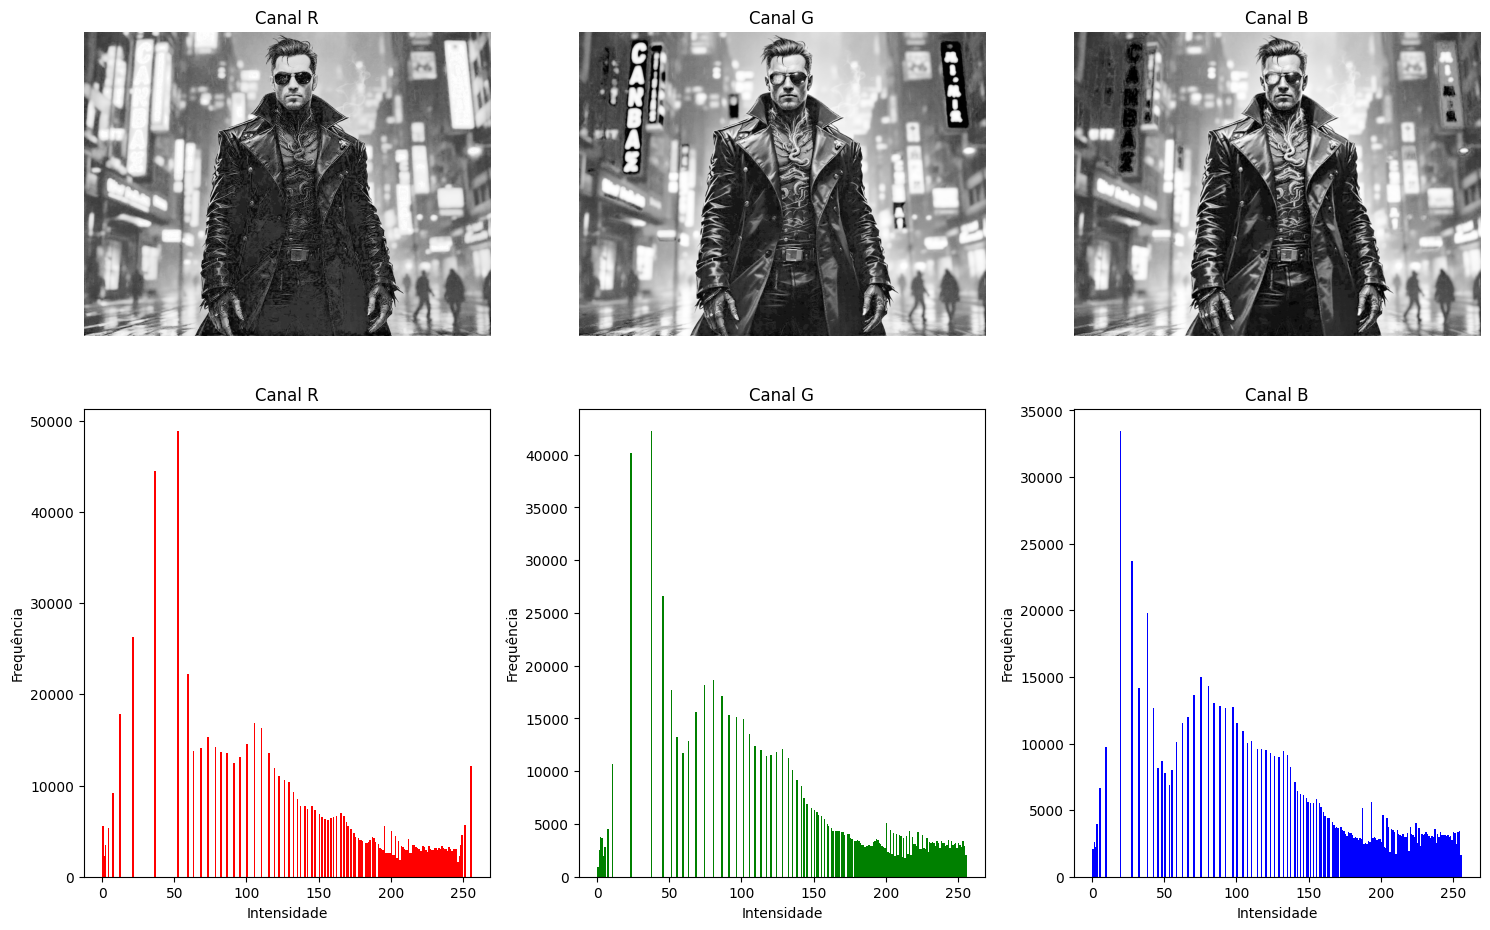

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('case.png')

# Converter de BGR para RGB (padrão do OpenCV é BGR, mas o Matplotlib usa RGB)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

print(imagem_rgb.shape)
print(imagem_rgb.max())

r, g, b = cv2.split(imagem_rgb)

def detailed_histogram_equalization(img, L=256):
    """Implementação didática com todas as etapas matemáticas"""
    # Passo 1: Calcular histograma
    hist = np.bincount(img.flatten(), minlength=L)

    # Passo 2: Calcular PMF e CDF
    pmf = hist / hist.sum()  # Função massa de probabilidade
    cdf = np.cumsum(pmf)     # Função distribuição cumulativa

    # Passo 3: Normalização do CDF
    cdf_min = cdf[hist > 0][0]  # Primeiro valor não-zero
    cdf_norm = (cdf - cdf_min) / (1 - cdf_min)

    # Passo 4: Aplicar transformação
    transformed = np.round((L-1) * cdf_norm).astype(np.uint8)

    # Passo 5: Mapear pixels
    return transformed[img]

# Versões processadas
img_opencv_r = cv2.equalizeHist(r)
img_opencv_g = cv2.equalizeHist(g)
img_opencv_b = cv2.equalizeHist(b)

# Análise comparativa
plt.figure(figsize=(15, 10))

# Visualização das imagens
for i, (title, img) in enumerate(zip(
    ['Canal R', 'Canal G', 'Canal B'],
    [img_opencv_r, img_opencv_g, img_opencv_b]
)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')

# Visualização dos histogramas
for i, (title, img, color) in enumerate(zip(
    ['Canal R', 'Canal G', 'Canal B'],
    [img_opencv_r, img_opencv_g, img_opencv_b],
    ['red', 'green', 'blue']
)):
    plt.subplot(2, 3, i+4)
    plt.hist(img.ravel(), bins=256, range=[0,256], color=color)
    plt.title(title)
    plt.xlabel('Intensidade')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

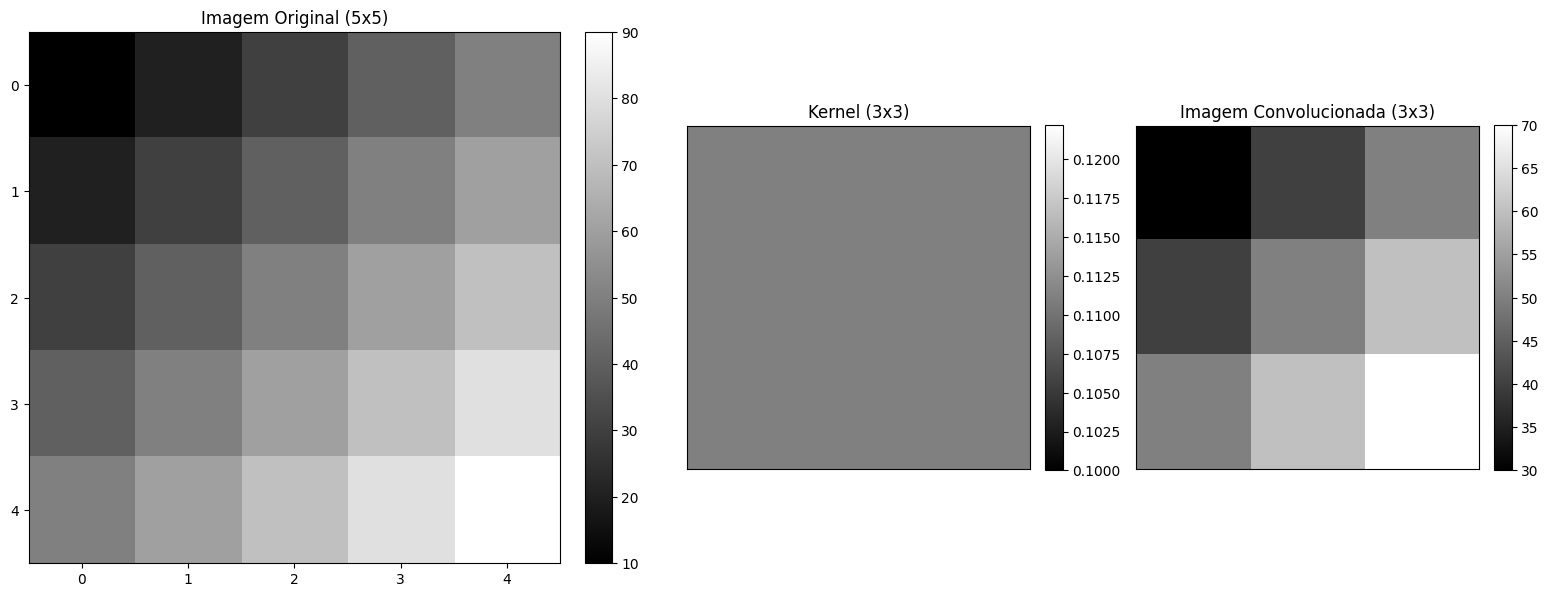

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Define a matriz da imagem
A = np.array([[10, 20, 30, 40, 50],
              [20, 30, 40, 50, 60],
              [30, 40, 50, 60, 70],
              [40, 50, 60, 70, 80],
              [50, 60, 70, 80, 90]])

# Define o kernel de média
B = np.array([[1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9],
              [1/9, 1/9, 1/9]])

# Realiza a convolução usando a função convolve2d do scipy
C = convolve2d(A, B, mode='valid')

# Subplots com aspect ratio
fig, axes = plt.subplots(1, 3, figsize=(16, 6),
                         gridspec_kw={'width_ratios': [5, 3, 3]})  # Proporção dos tamanhos

# Imagem original
im1 = axes[0].imshow(A, cmap='gray', aspect='equal')
axes[0].set_title(f'Imagem Original ({A.shape[0]}x{A.shape[1]})')
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Kernel - respeitando a proporção
im2 = axes[1].imshow(B, cmap='gray', aspect='equal')
axes[1].set_title(f'Kernel ({B.shape[0]}x{B.shape[1]})')
axes[1].set_xticks([])  # Remove os valores do eixo x
axes[1].set_yticks([])  # Remove os valores do eixo y
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

# Imagem convolucionada
im3 = axes[2].imshow(C, cmap='gray', aspect='equal')
axes[2].set_title(f'Imagem Convolucionada ({C.shape[0]}x{C.shape[1]})')
axes[2].set_xticks([])  # Remove os valores do eixo x
axes[2].set_yticks([])  # Remove os valores do eixo y
fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

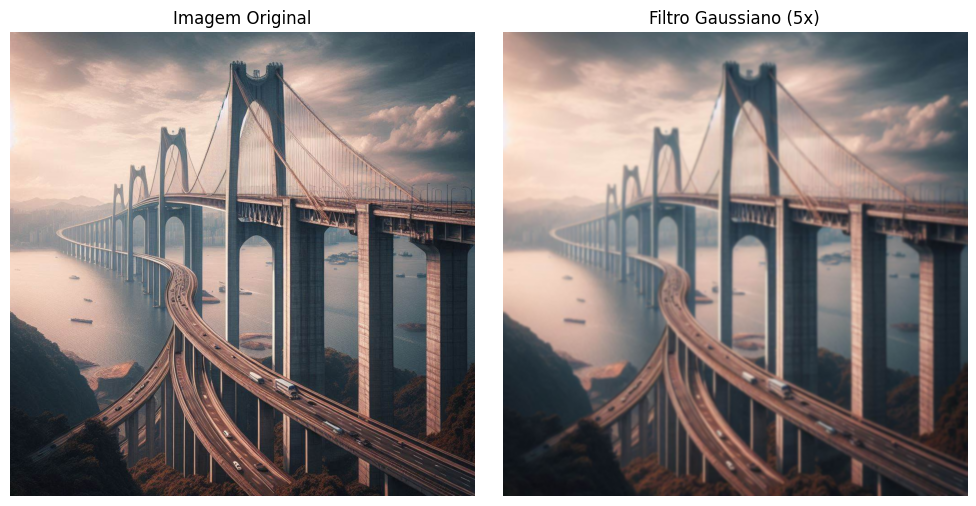

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carrega a imagem
img = cv2.imread('bridge.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Número de iterações do filtro Gaussiano
num_iterations = 5  # Altere conforme desejar

# Cria uma cópia da imagem para aplicar o filtro iterativamente
blurred_img = img.copy()

for _ in range(num_iterations):
    blurred_img = cv2.GaussianBlur(blurred_img, (5, 5), 0) #img, kernel, std

# Plota apenas a original e a última versão borrada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img)
plt.title(f"Filtro Gaussiano ({num_iterations}x)")
plt.axis('off')

plt.tight_layout()
plt.show()

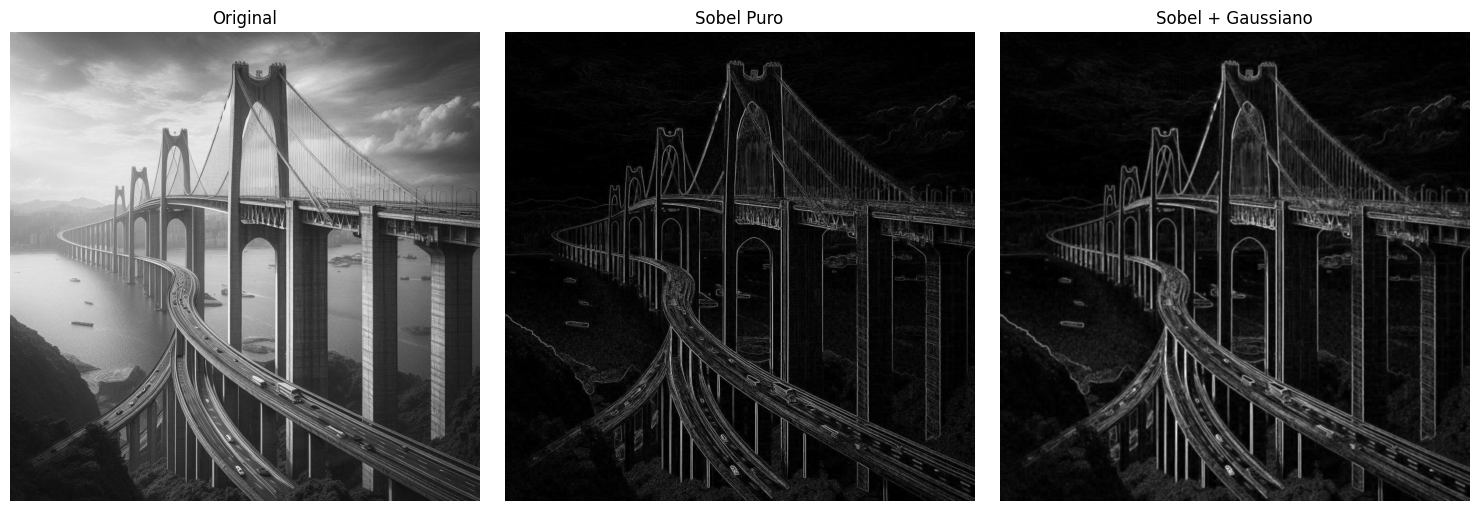

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem original
img = cv2.imread('bridge.jpeg', cv2.IMREAD_GRAYSCALE)  # Sobel funciona melhor em tons de cinza

# Aplica Sobel nos dois eixos
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Aplica Gaussiano DEPOIS (opcional para suavizar ruído nas bordas)
blurred_edges = cv2.GaussianBlur(sobel_combined, (5,5), 0)

# Plota os resultados
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(sobel_combined, cmap='gray')
axs[1].set_title("Sobel Puro")
axs[1].axis('off')

axs[2].imshow(blurred_edges, cmap='gray')
axs[2].set_title("Sobel + Gaussiano")
axs[2].axis('off')

plt.tight_layout()
plt.show()

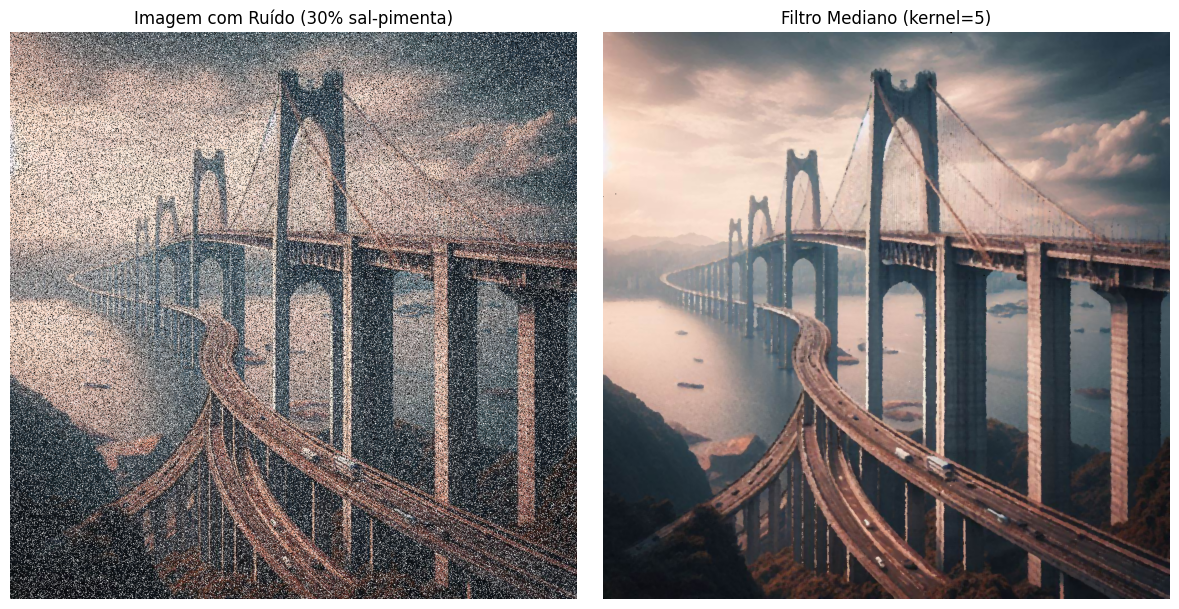

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar imagem original
img = cv2.imread('bridge.jpeg')  # Substitua pelo seu arquivo
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Adicionar ruído artificial (sal e pimenta)
def add_salt_pepper_noise(image, prob=0.05):
    output = np.copy(image)
    # Ruído sal (branco)
    salt = np.random.rand(*image.shape[:2]) < prob/2
    output[salt] = 255
    # Ruído pimenta (preto)
    pepper = np.random.rand(*image.shape[:2]) < prob/2
    output[pepper] = 0
    return output

noisy_img = add_salt_pepper_noise(img, prob=0.3)  # 30% de ruído

# Aplicar filtro mediano
median = cv2.medianBlur(noisy_img, 5)  # Kernel size 5 (deve ser ímpar)

# Visualização comparativa
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(noisy_img)
axs[0].set_title(f"Imagem com Ruído (30% sal-pimenta)")
axs[0].axis('off')

axs[1].imshow(median)
axs[1].set_title("Filtro Mediano (kernel=5)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

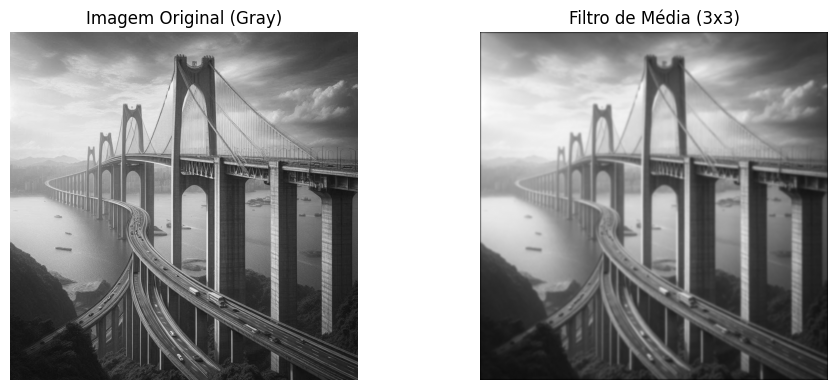

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Carregar imagem em escala de cinza
img = plt.imread('bridge.jpeg')
img = img.mean(axis=2)  # Converter para escala de cinza

# Define o kernel de média (suavização simples)
kernel = np.ones((3, 3)) / 9

# Aplica a convolução
output = img.copy()

# num de convoluções
n = 10
for i in range(n):
    output = convolve2d(output, kernel, mode='same', boundary='fill', fillvalue=0)

# Visualização
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Imagem Original (Gray)")
axs[0].axis('off')

axs[1].imshow(output, cmap='gray')
axs[1].set_title("Filtro de Média (3x3)")
axs[1].axis('off')

plt.tight_layout()
plt.show()

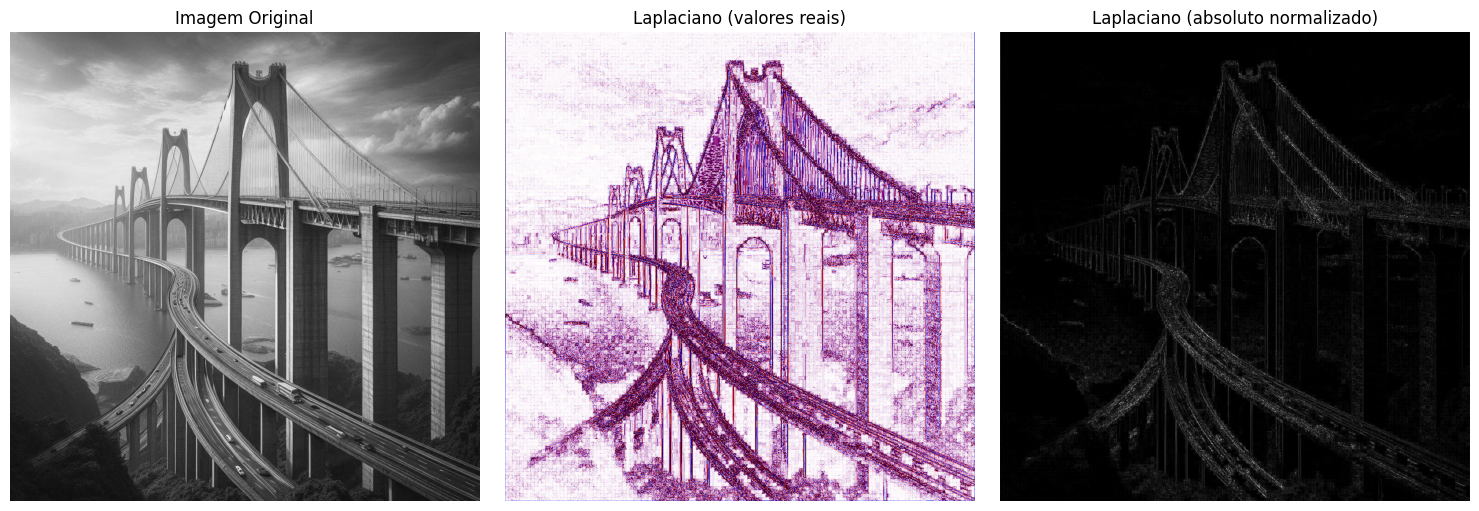

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Carregar imagem em escala de cinza
img = plt.imread('bridge.jpeg')
if img.ndim == 3:  # Se for colorida (RGB)
    img = img.mean(axis=2)  # Converter para escala de cinza

# Define o kernel Laplaciano
kernel = np.array([[0,  1, 0],
                   [1, -4, 1],
                   [0,  1, 0]])

# Aplica convolução
output = convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)

# Pré-processamento para visualização
output_visual = np.abs(output)  # Valor absoluto para ver todas as bordas
output_visual = (output_visual - output_visual.min()) / (output_visual.max() - output_visual.min())  # Normaliza para [0,1]

# Visualização melhorada
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Imagem original
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Imagem Original")
axs[0].axis('off')

# Resultado Laplaciano (valores brutos)
axs[1].imshow(output, cmap='seismic', vmin=-100, vmax=100)  # Cores: vermelho=negativo, azul=positivo
axs[1].set_title("Laplaciano (valores reais)")
axs[1].axis('off')

# Resultado Laplaciano (absoluto normalizado)
axs[2].imshow(output_visual, cmap='gray')
axs[2].set_title("Laplaciano (absoluto normalizado)")
axs[2].axis('off')

plt.tight_layout()
plt.show()